## 路径处理

In [ ]:
import os
import pandas as pd


folder = "Amplitude_0.05 bias_0.8"
file_name = "output_0.csv"  # 替换成你要打开的文件名
path = os.path.join(folder, file_name)
df = pd.read_csv(path)

# 打印前几行数据
print(df.head())

## 批量处理

In [ ]:
for i in range(0, 1001, 50):
    file_name = f"output_{i}.csv"  # 替换成你要打开的文件名
    path = os.path.join(folder, file_name)
    df = pd.read_csv(path)

    # 打印前几行数据
    print(df.head())

In [ ]:
import os
import pandas as pd

folder = "Amplitude_0.05 bias_0.8"

# 用字典存储所有 DataFrame
df_dict = {}

for i in range(0, 1001, 50):
    file_name = f"output_{i}.csv"
    path = os.path.join(folder, file_name)
    
    if os.path.exists(path):
        df = pd.read_csv(path)
        df_dict[i] = df  
        print(f"读取 {file_name}:")
        # print(df.head())
    else:
        print(f"文件 {file_name} 不存在，跳过")

In [ ]:
# print(df_dict.keys())
# print(df_dict[0].head())

## 依次读取电压电流以及时间信息

In [ ]:
voltage_dict = {}
current_dict = {}
time_dict = {}

for key, df in df_dict.items():
    try:
        voltage = df["Vm"].values   # 或 df["U"]
        current = df["Am"].values   # 或 df["I"]
        time = df["x"].values         # 或 df["t"]
        
        voltage_dict[key] = voltage
        current_dict[key] = current
        time_dict[key] = time

    except KeyError as e:
        print(f"⚠️ output_{key}.csv 缺失列：{e}，跳过")

In [ ]:
# print("电压字典：", voltage_dict.keys())
# print("电流字典：", current_dict.keys())
# print("时间字典：", time_dict.keys())

# 含有直流分量的情况下

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 存储 FFT 数据的字典（包括 magnitude 和 phase）
voltage_fft_dict = {}
current_fft_dict = {}

for key in voltage_dict:
    voltage = voltage_dict[key]
    current = current_dict[key]
    time = time_dict[key]

    # 计算采样频率
    fs = 2000

    # FFT
    voltage_fft = np.fft.fft(voltage)
    current_fft = np.fft.fft(current)
    freqs = np.fft.fftfreq(len(time), d=1/fs)

    # 只取正频率部分
    half = len(time) // 2
    freqs_half = freqs[:half]
    voltage_mag = (2 / len(time)) * np.abs(voltage_fft[:half])
    current_mag = (2 / len(time)) * np.abs(current_fft[:half])
    voltage_phase = np.angle(voltage_fft[:half])
    current_phase = np.angle(current_fft[:half])

    # 存入字典（使用元组形式：频率, 幅值, 相角）
    voltage_fft_dict[key] = (freqs_half, voltage_mag, voltage_phase)
    current_fft_dict[key] = (freqs_half, current_mag, current_phase)

    # 可视化其中一组
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(freqs_half, voltage_mag)
    plt.title(f"Voltage Magnitude FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(freqs_half, voltage_phase)
    plt.title(f"Voltage Phase FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (rad)")
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(freqs_half, current_mag)
    plt.title(f"Current Magnitude FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(freqs_half, current_phase)
    plt.title(f"Current Phase FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (rad)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()


## 不含有直流分量的情况下

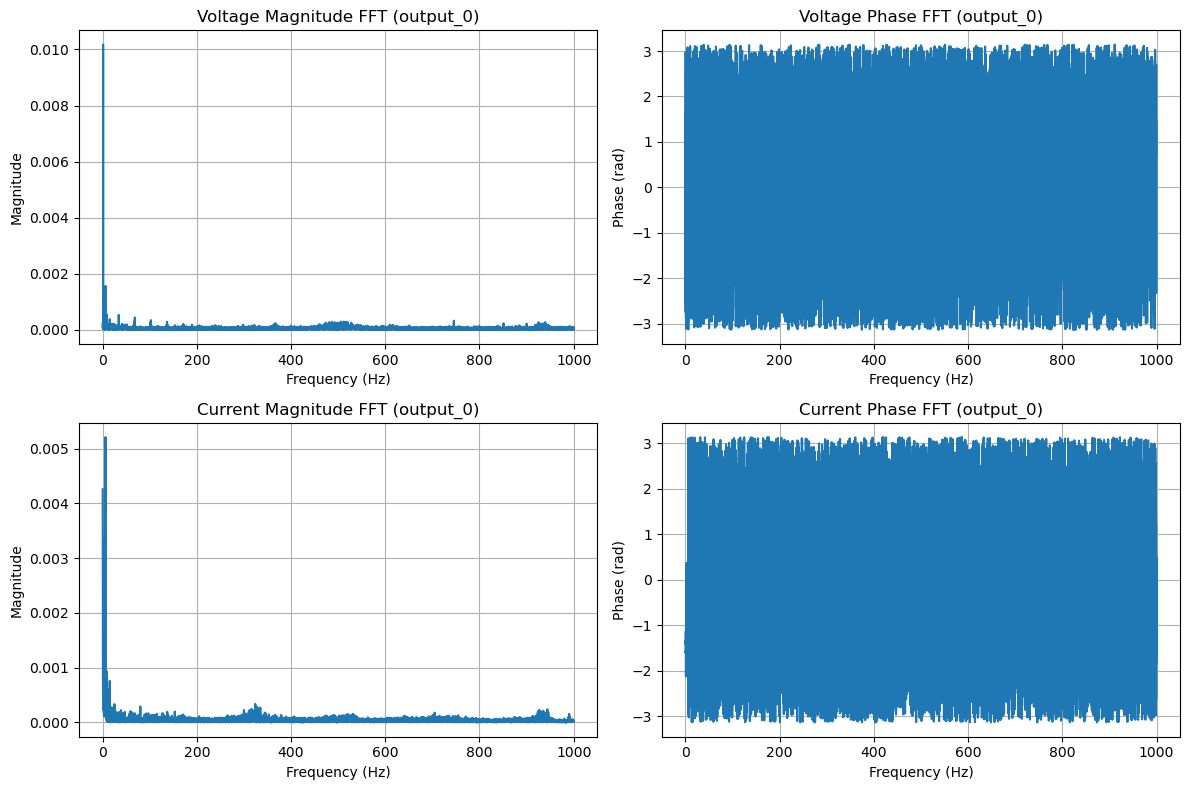

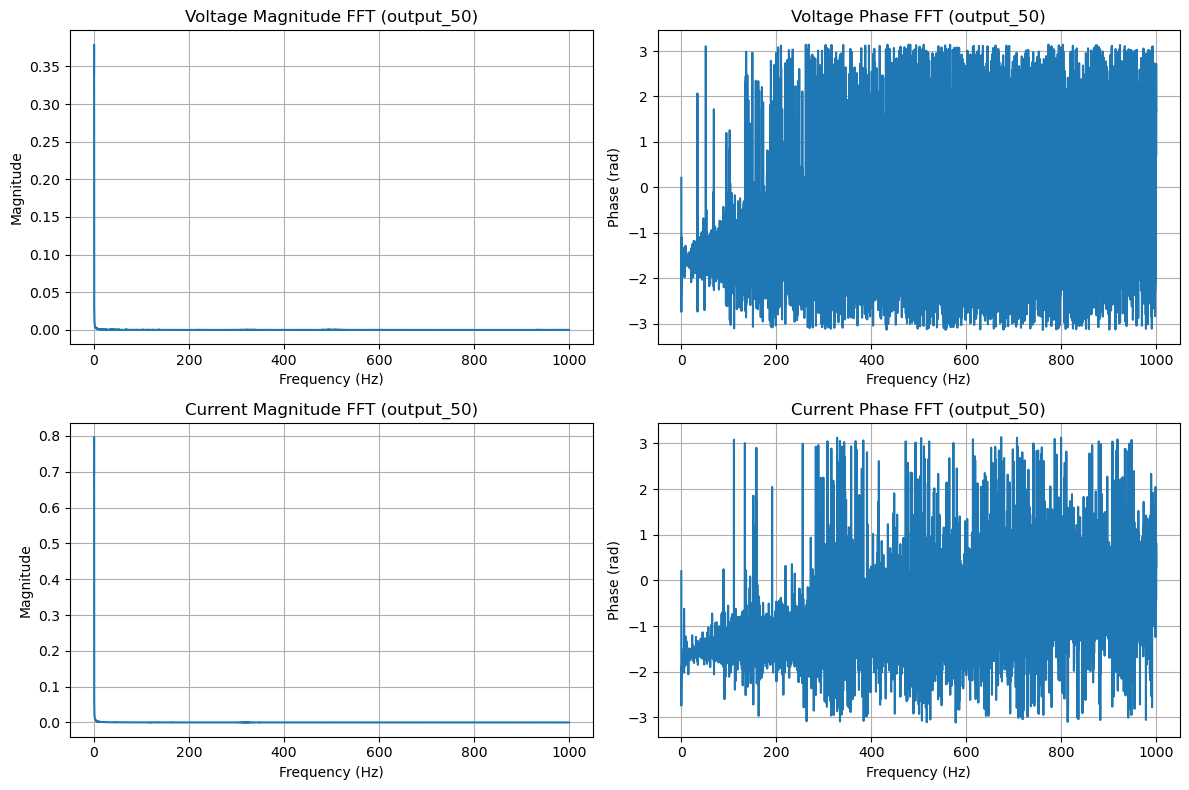

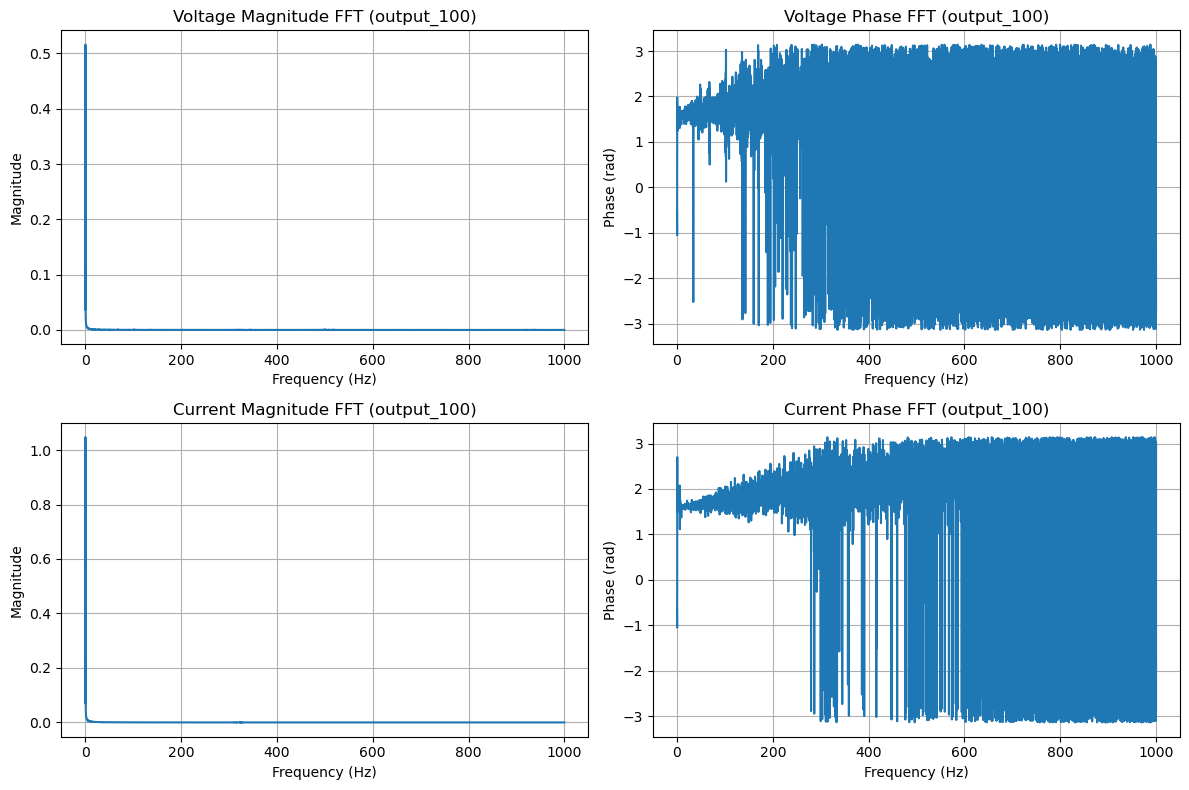

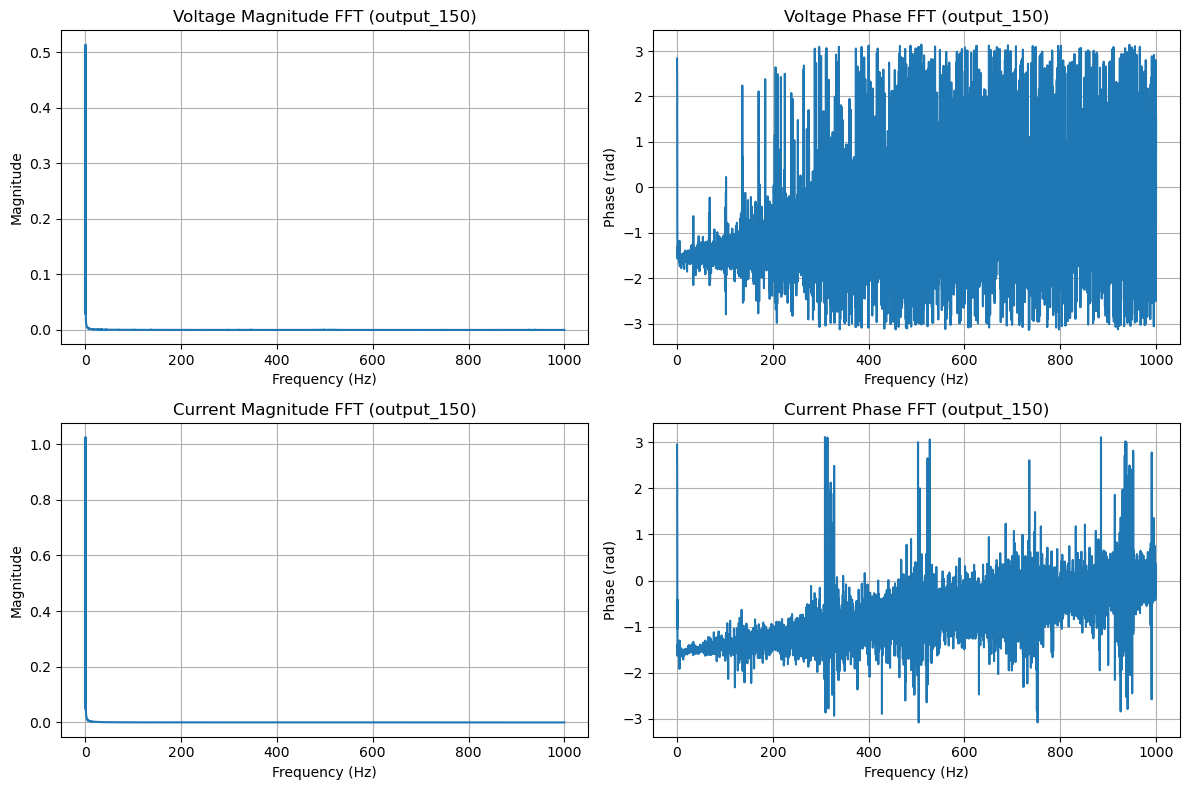

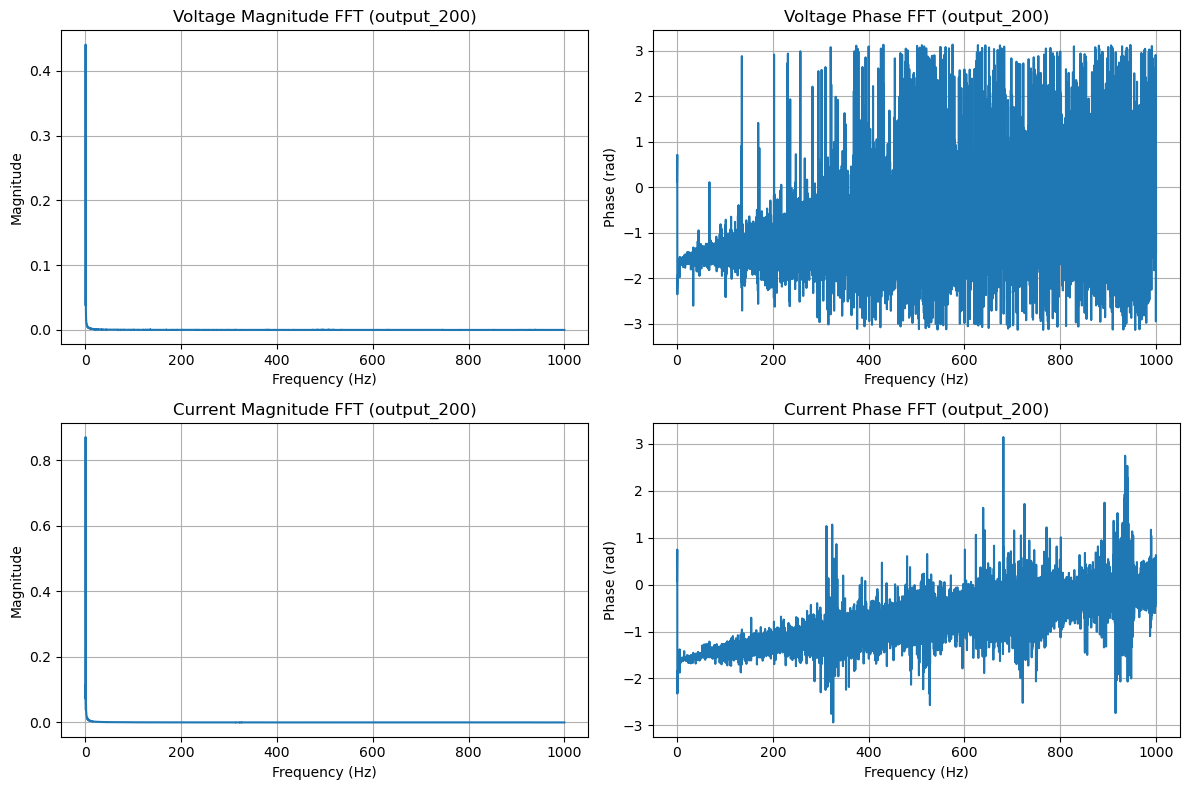

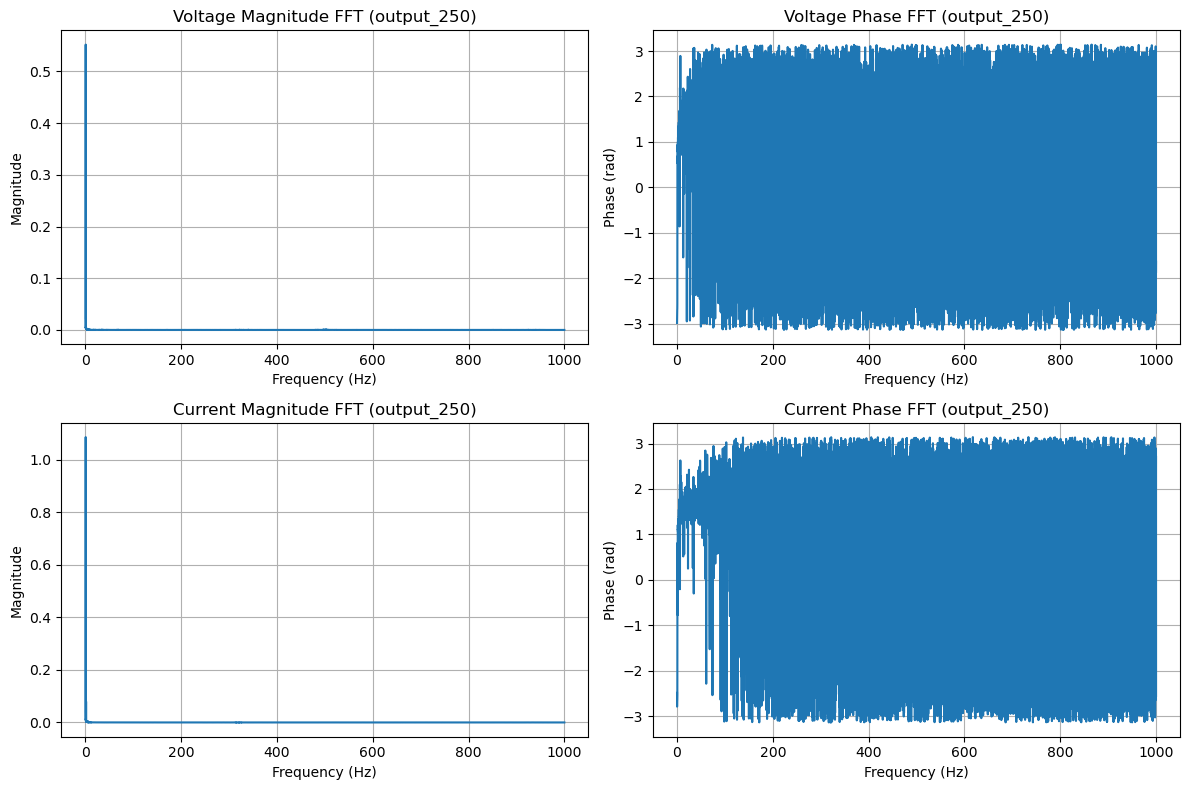

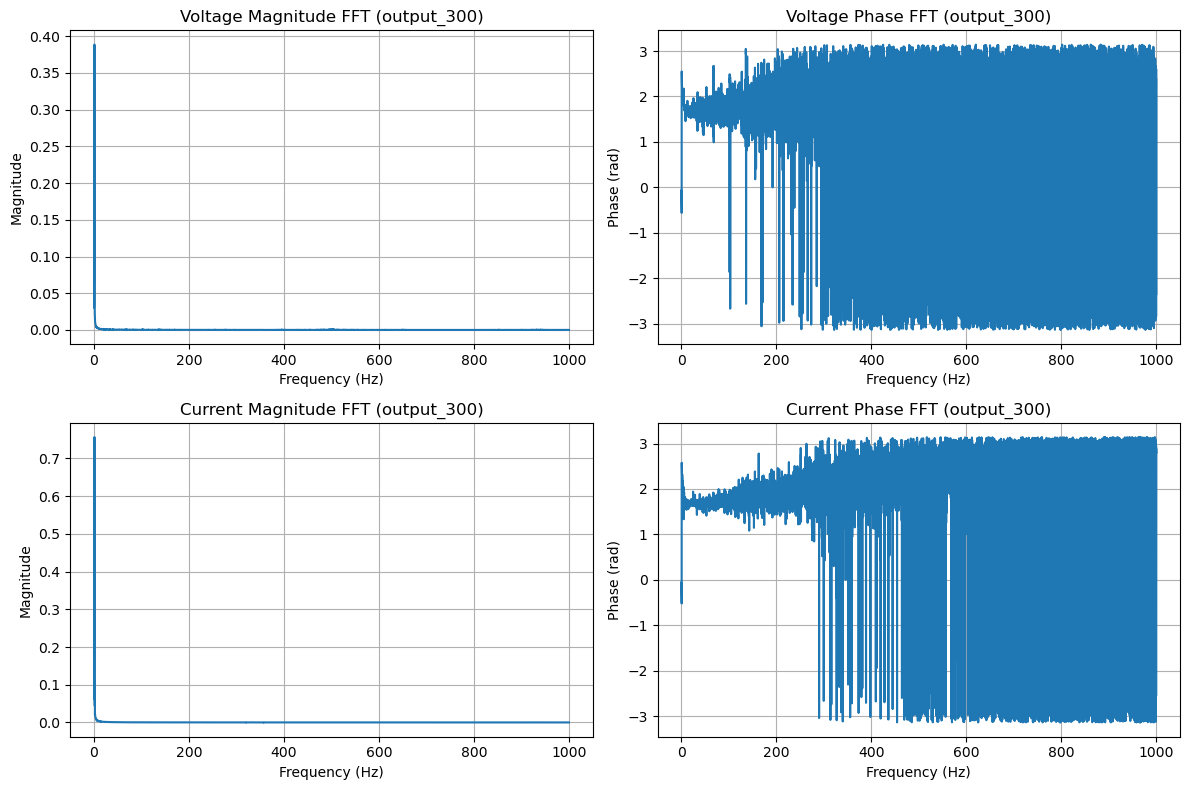

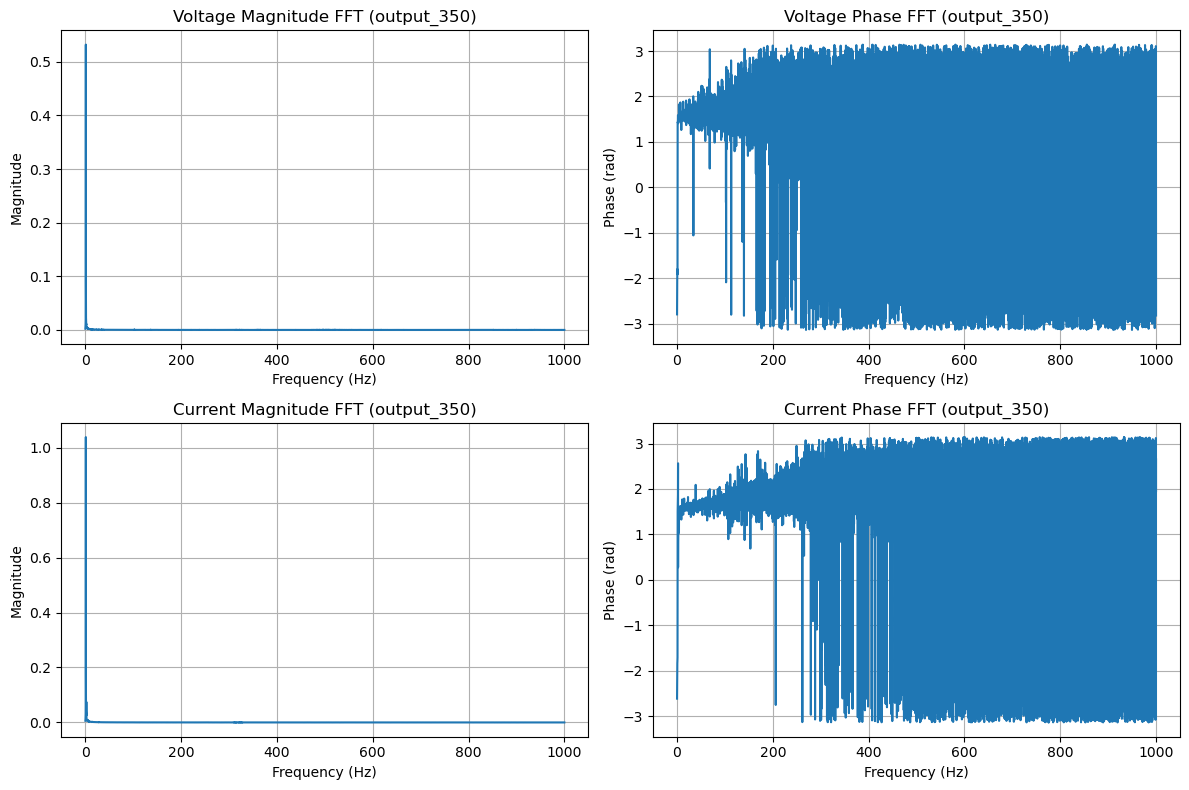

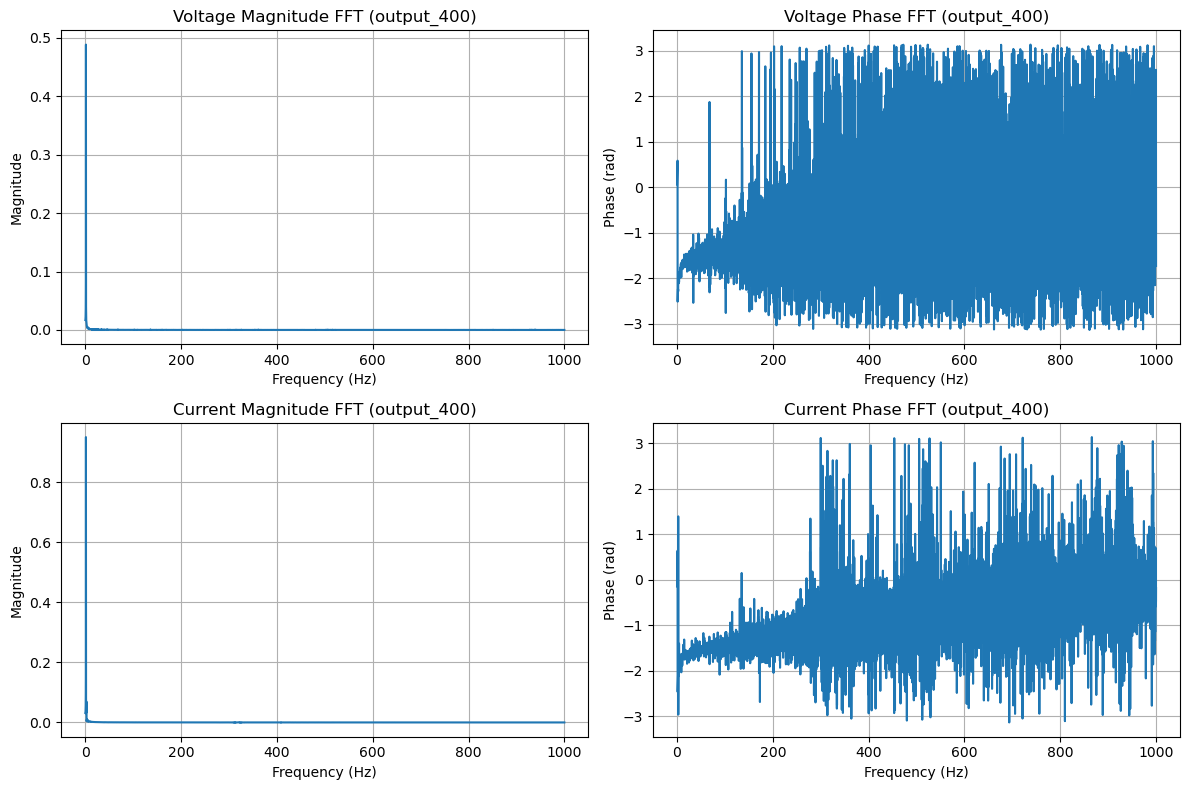

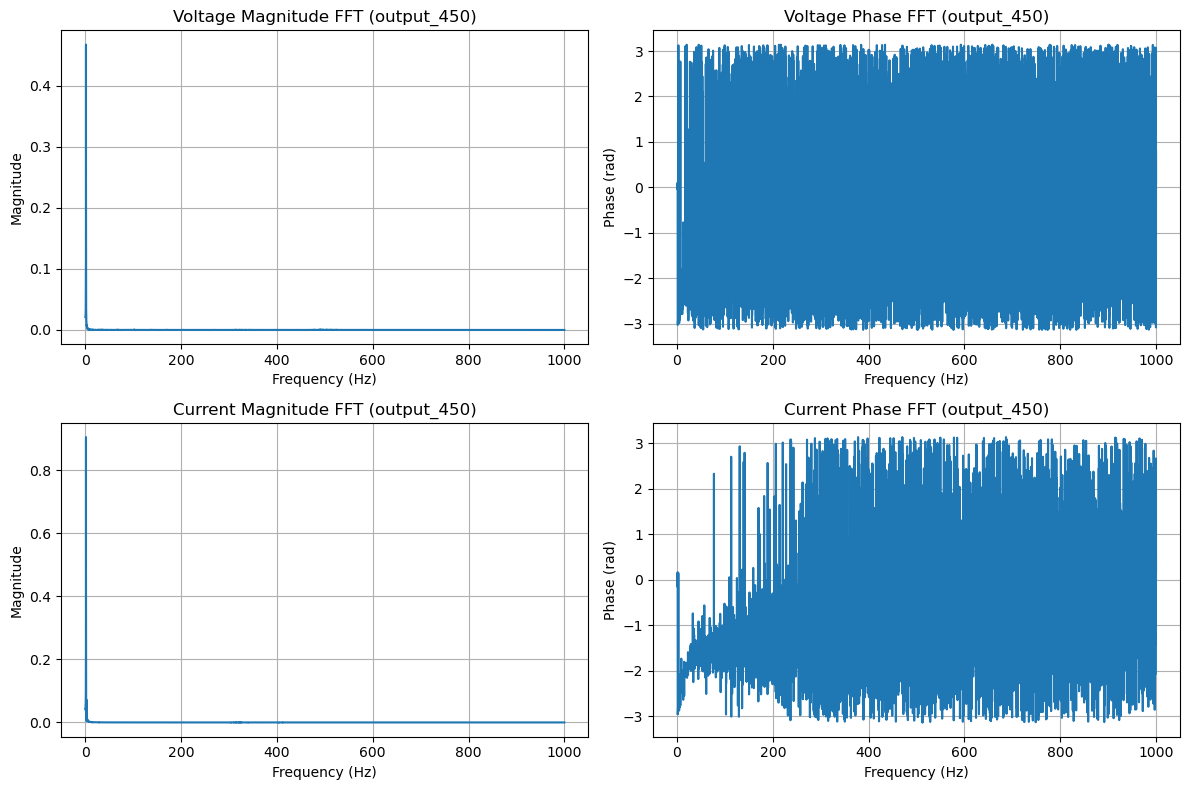

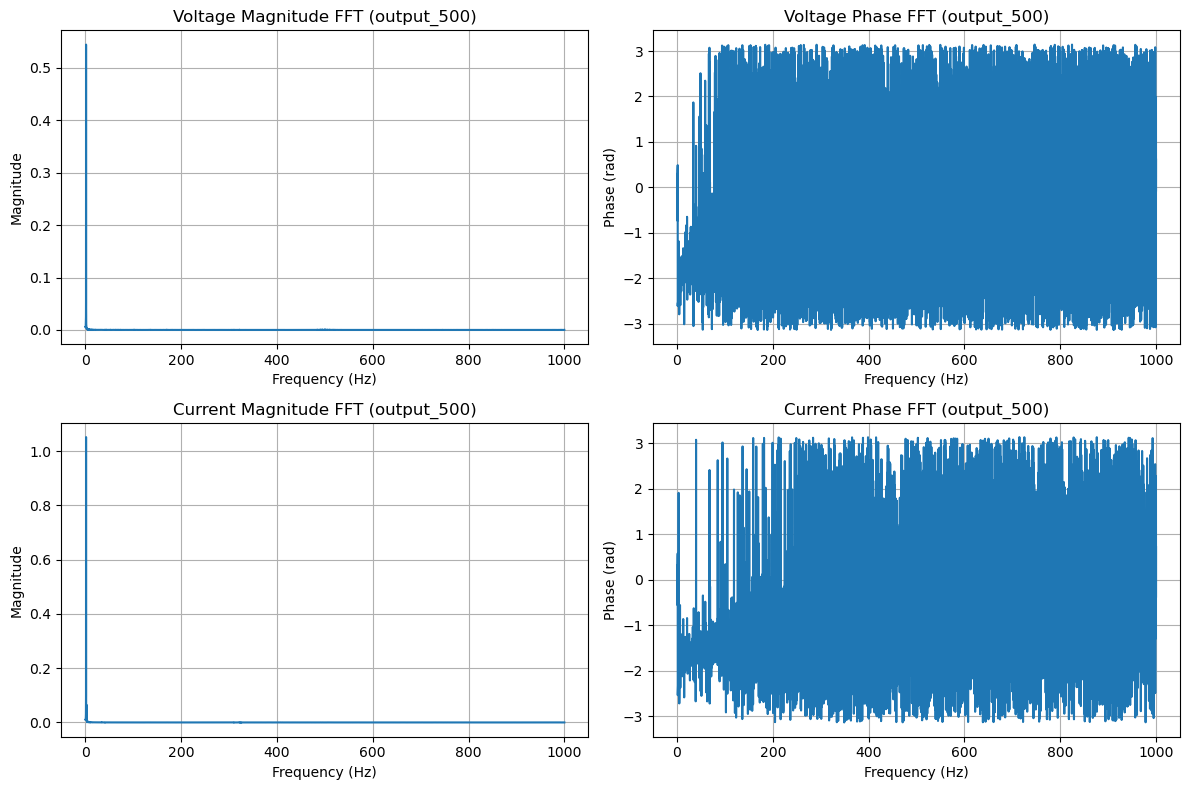

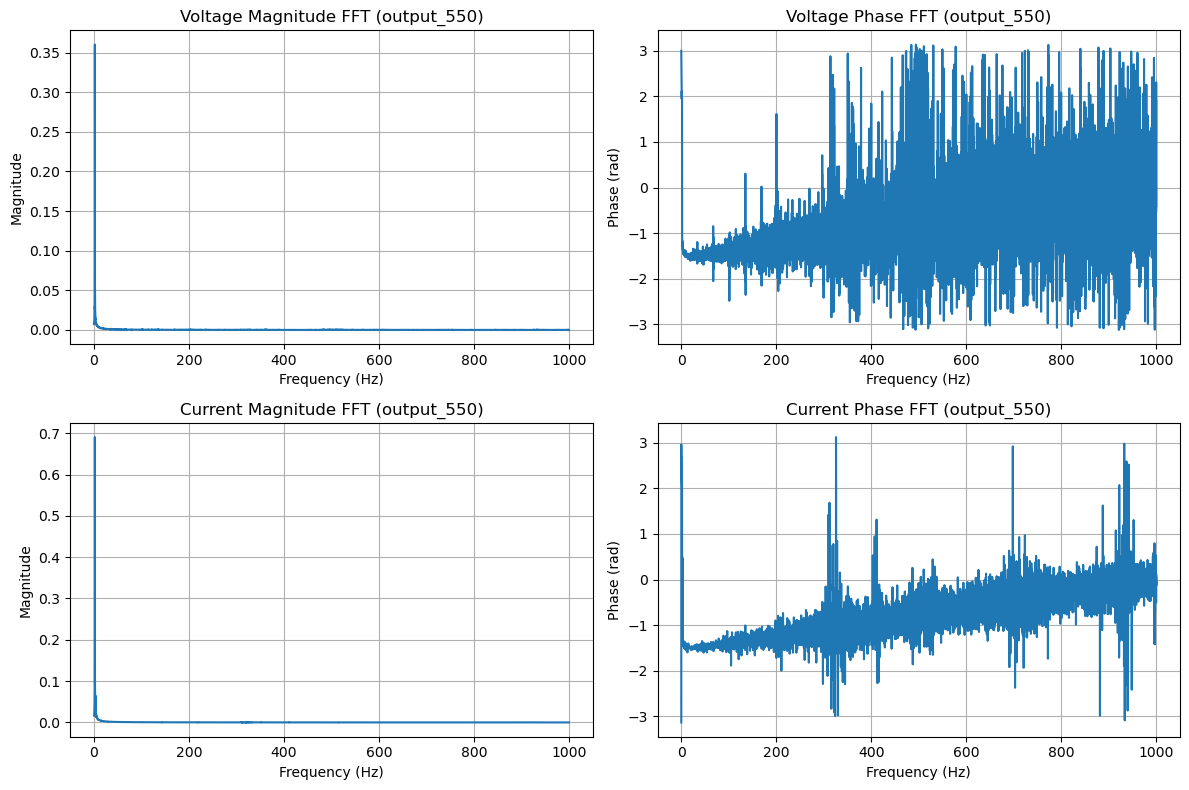

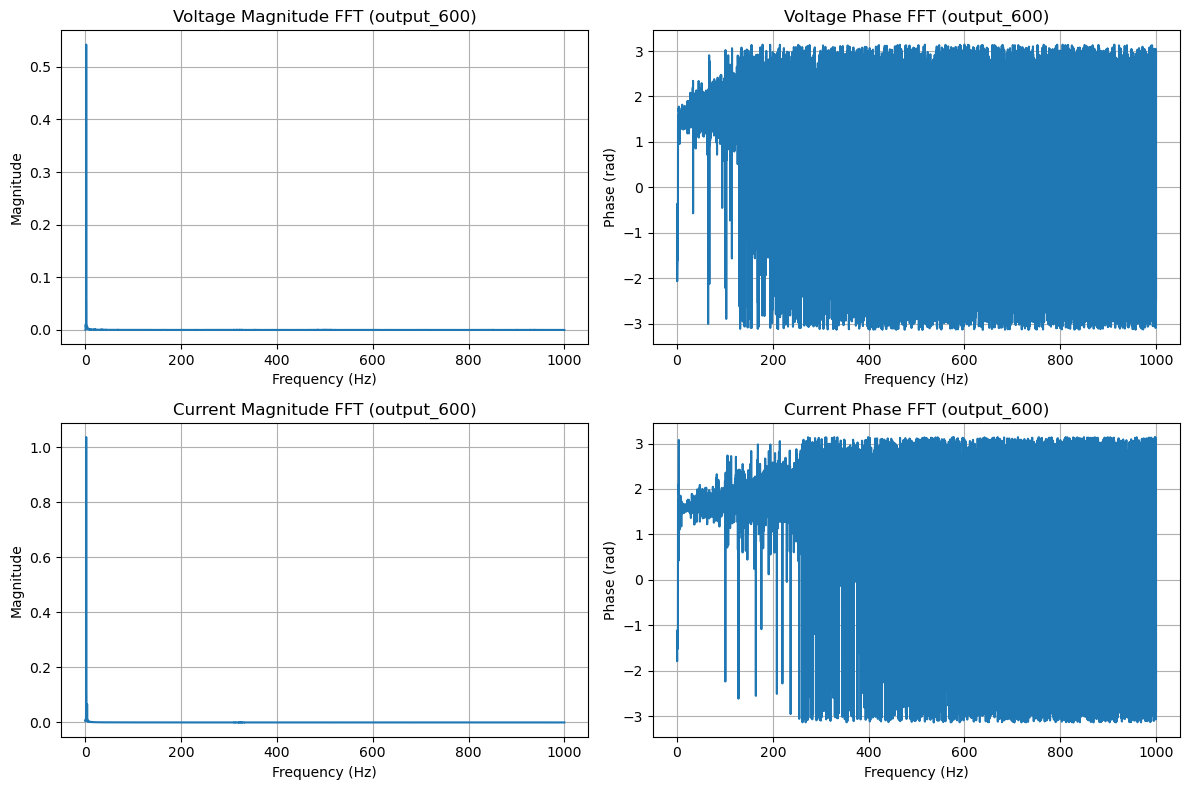

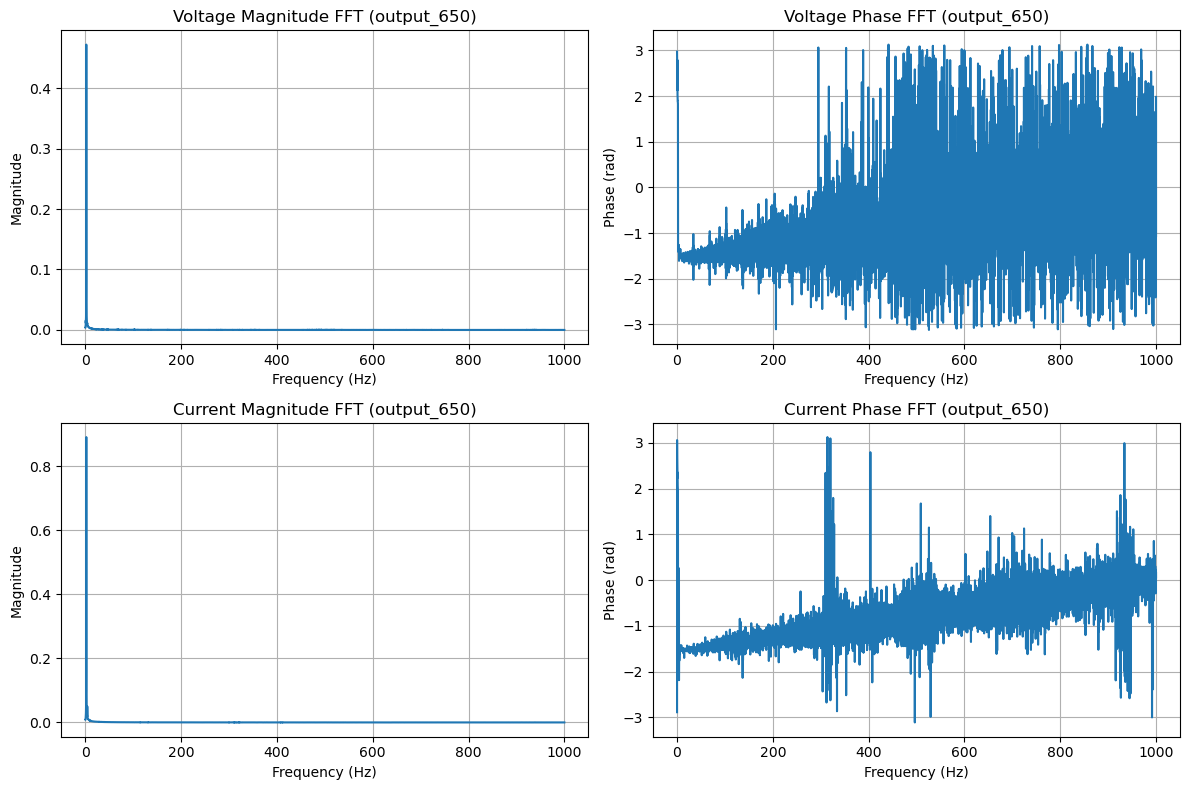

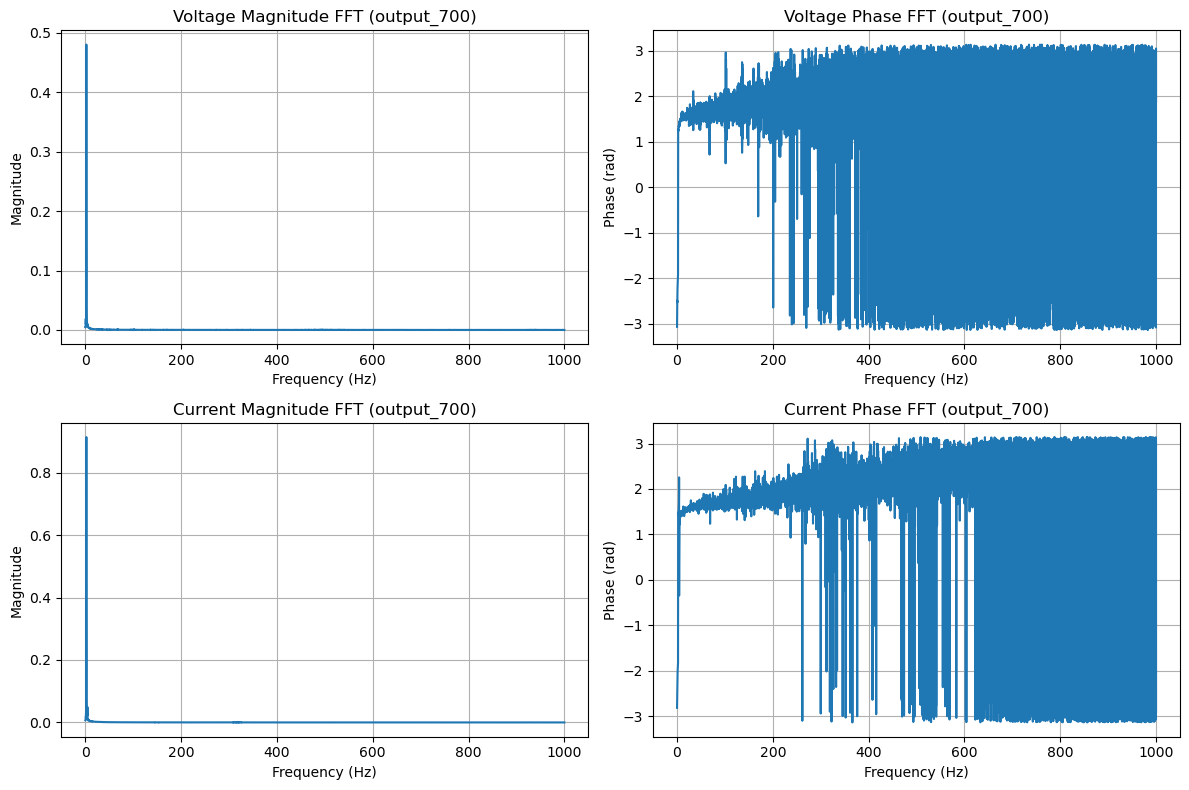

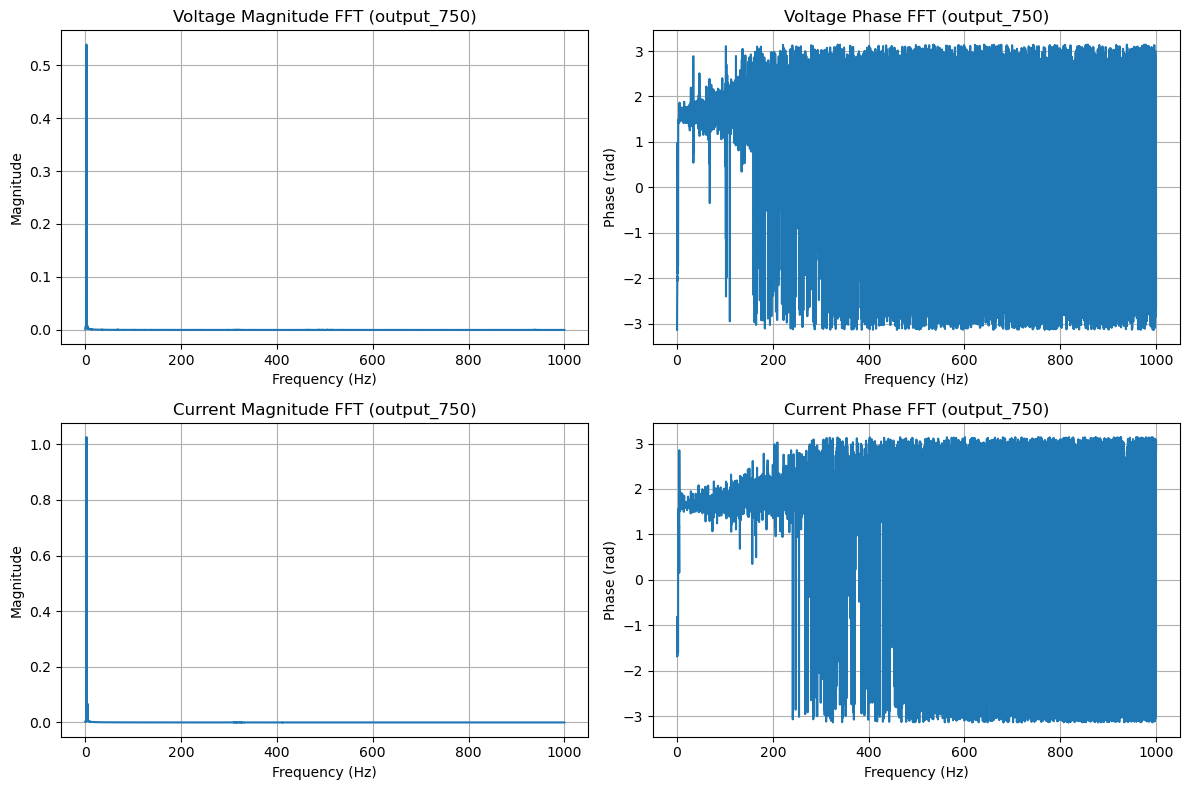

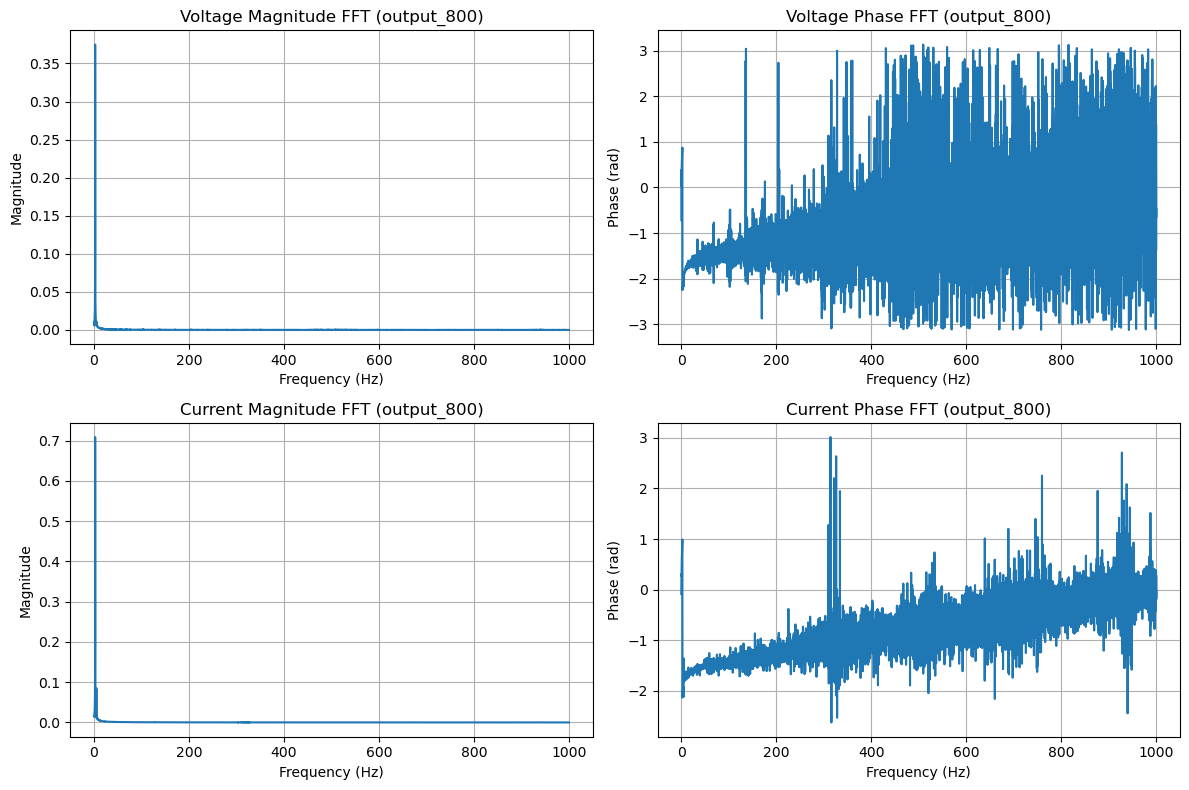

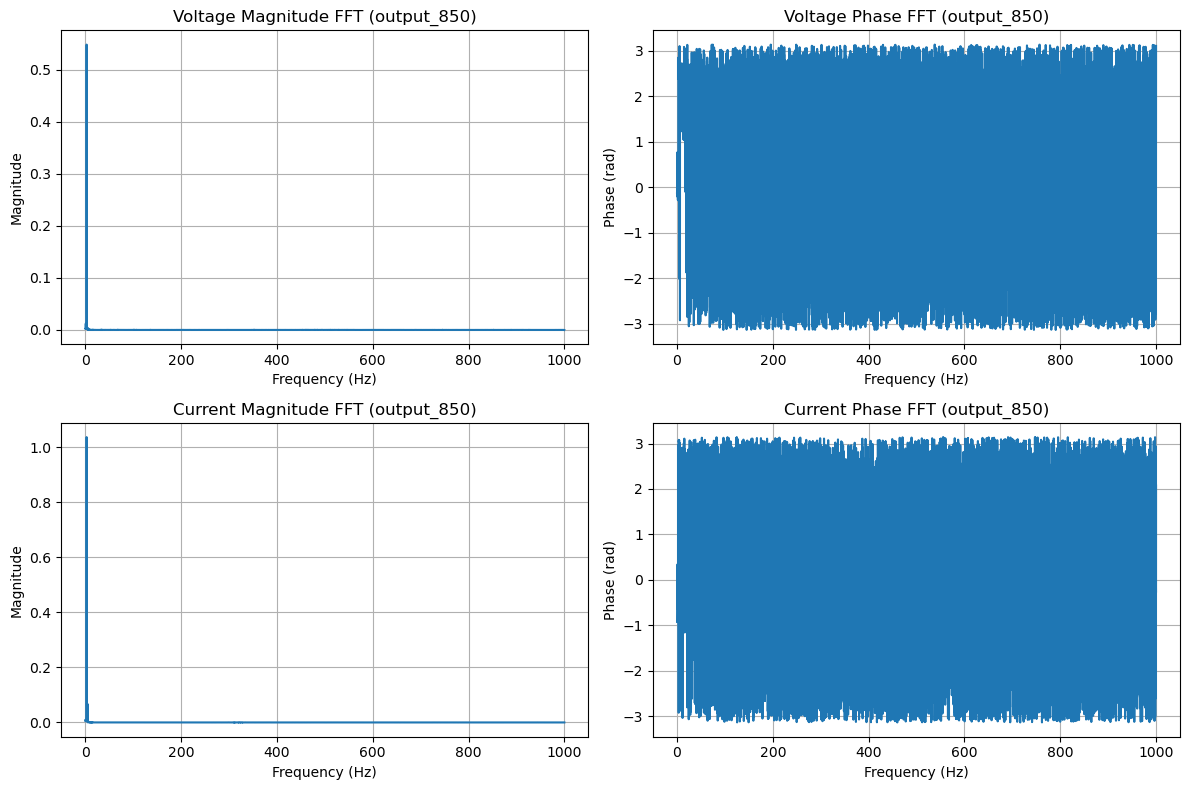

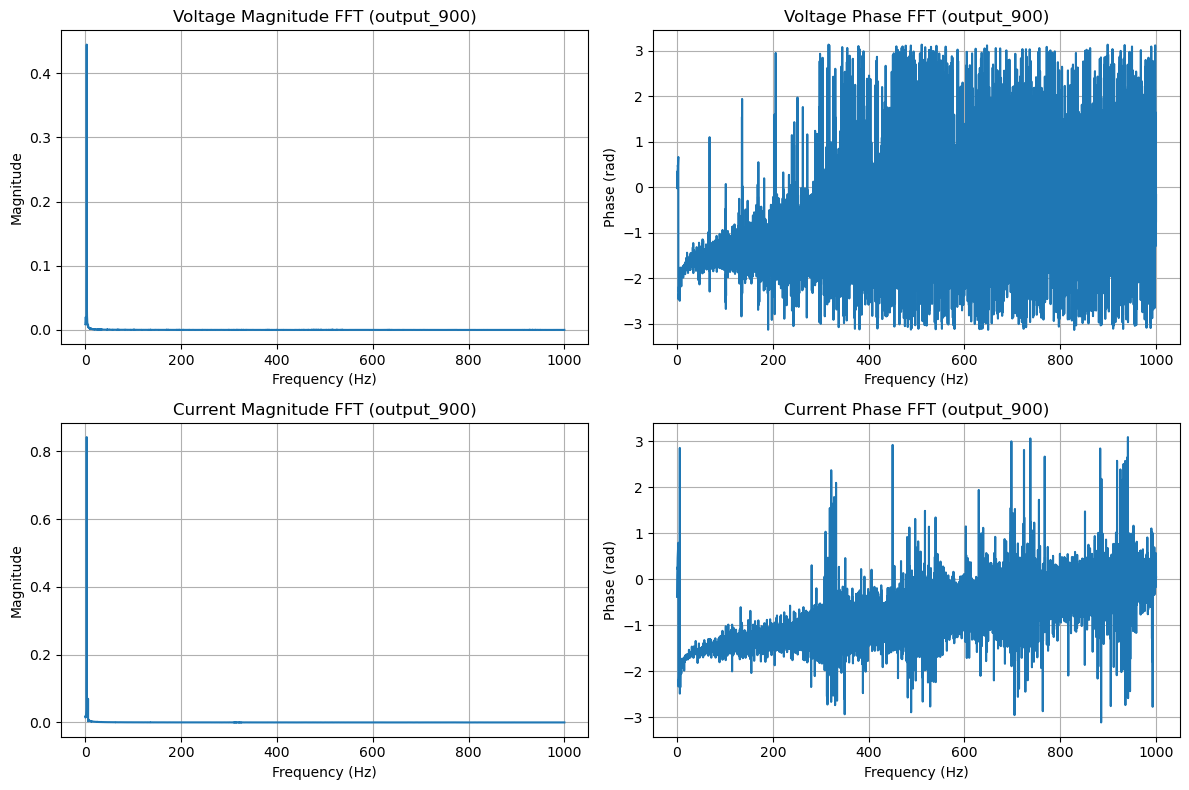

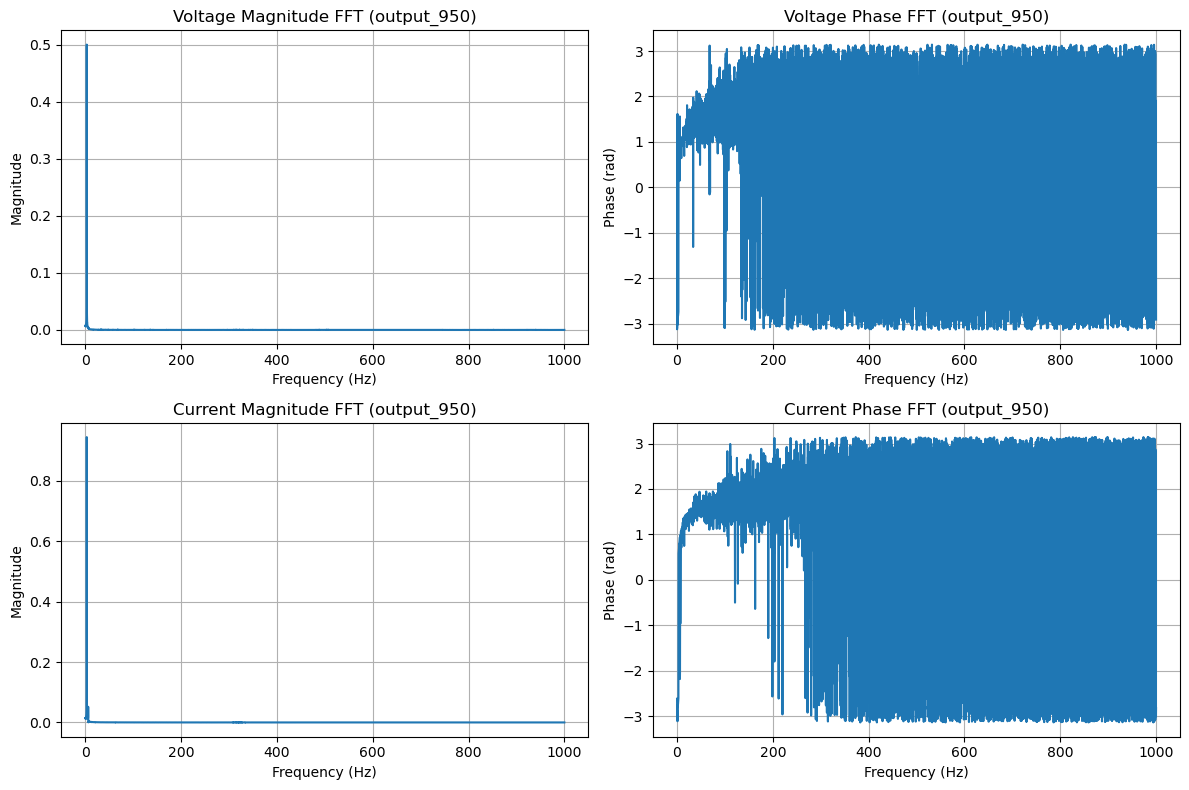

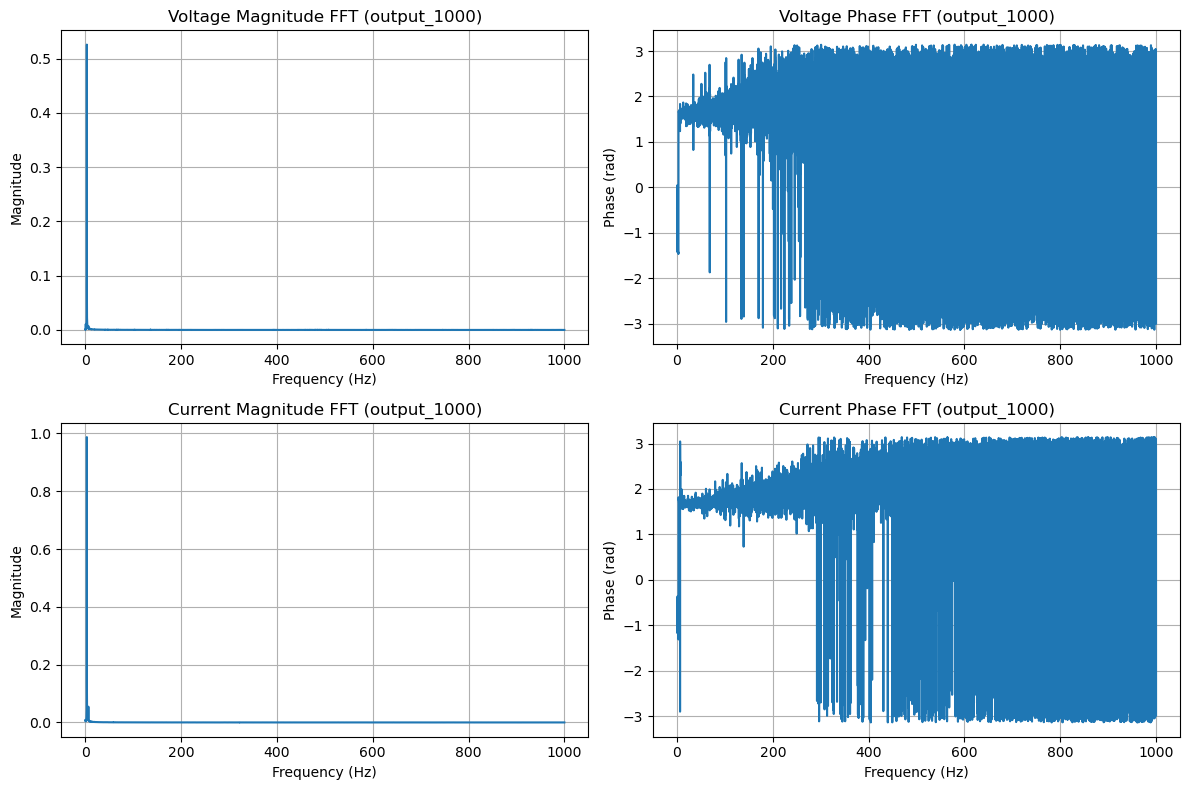

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# 存储 FFT 数据的字典（包括 magnitude 和 phase）
voltage_fft_dict = {}
current_fft_dict = {}

for key in voltage_dict:
    voltage = voltage_dict[key]
    current = current_dict[key]
    time = time_dict[key]

    # 计算采样频率
    fs = 2000

    # FFT
    voltage_fft = np.fft.fft(voltage)
    current_fft = np.fft.fft(current)
    freqs = np.fft.fftfreq(len(time), d=1/fs)

    # 只取正频率部分
    half = len(time) // 2
    freqs_half = freqs[:half]
    voltage_mag = (2 / len(time)) * np.abs(voltage_fft[:half])
    current_mag = (2 / len(time)) * np.abs(current_fft[:half])
    voltage_phase = np.angle(voltage_fft[:half])
    current_phase = np.angle(current_fft[:half])
    # 去掉直流分量（第一个频率为0的点）
    freqs_half = freqs_half[1:]
    voltage_mag = voltage_mag[1:]
    voltage_phase = voltage_phase[1:]

    # 同样处理电流
    current_mag = (2 / len(time)) * np.abs(current_fft[:half])[1:]
    current_phase = np.angle(current_fft[:half])[1:]
    
    # 存入字典（使用元组形式：频率, 幅值, 相角）
    voltage_fft_dict[key] = (freqs_half, voltage_mag, voltage_phase)
    current_fft_dict[key] = (freqs_half, current_mag, current_phase)

    # 可视化其中一组
    plt.figure(figsize=(12, 8))

    plt.subplot(2, 2, 1)
    plt.plot(freqs_half, voltage_mag)
    plt.title(f"Voltage Magnitude FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)

    plt.subplot(2, 2, 2)
    plt.plot(freqs_half, voltage_phase)
    plt.title(f"Voltage Phase FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (rad)")
    plt.grid(True)

    plt.subplot(2, 2, 3)
    plt.plot(freqs_half, current_mag)
    plt.title(f"Current Magnitude FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Magnitude")
    plt.grid(True)

    plt.subplot(2, 2, 4)
    plt.plot(freqs_half, current_phase)
    plt.title(f"Current Phase FFT (output_{key})")
    plt.xlabel("Frequency (Hz)")
    plt.ylabel("Phase (rad)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

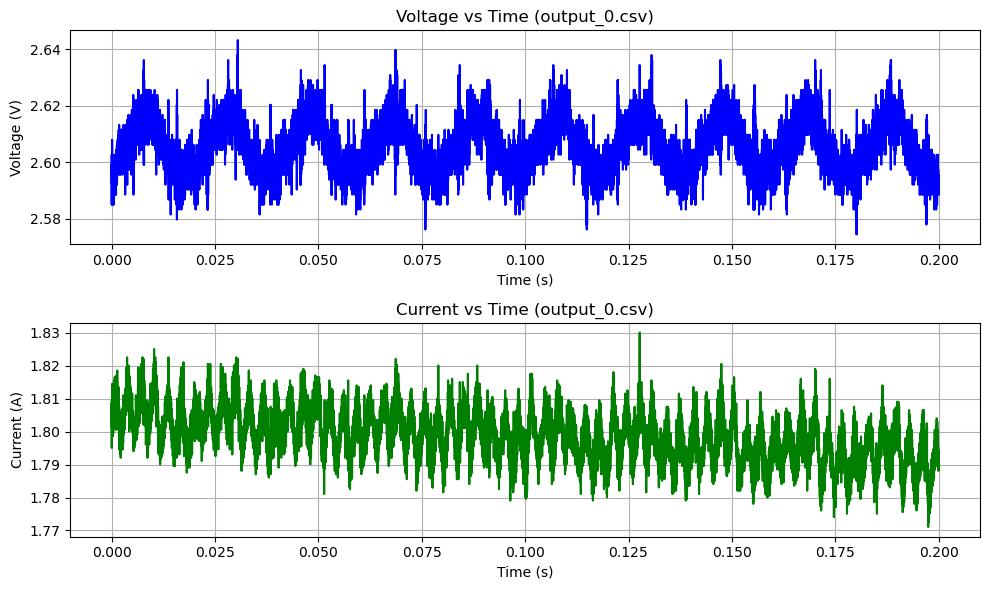

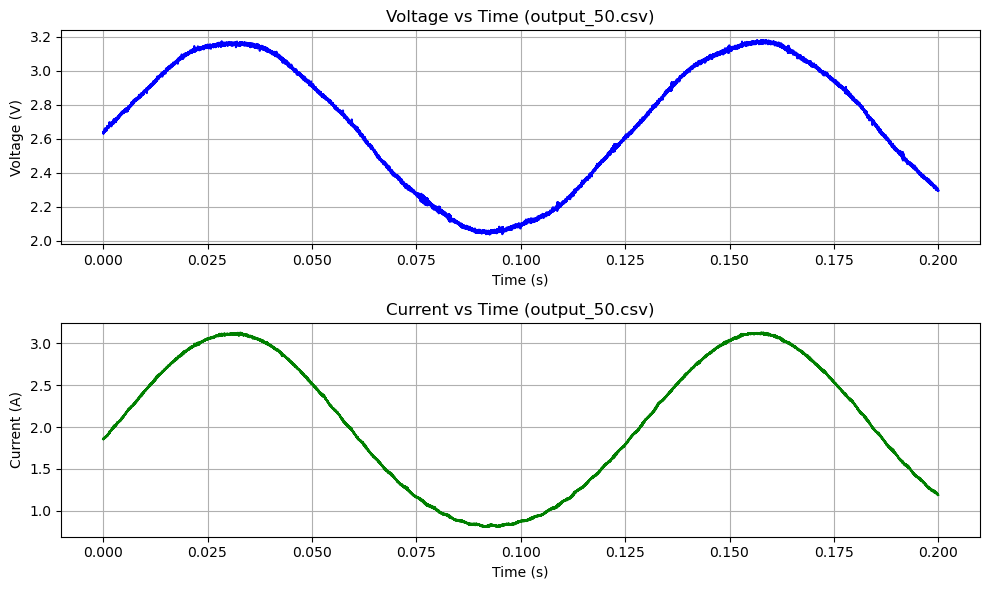

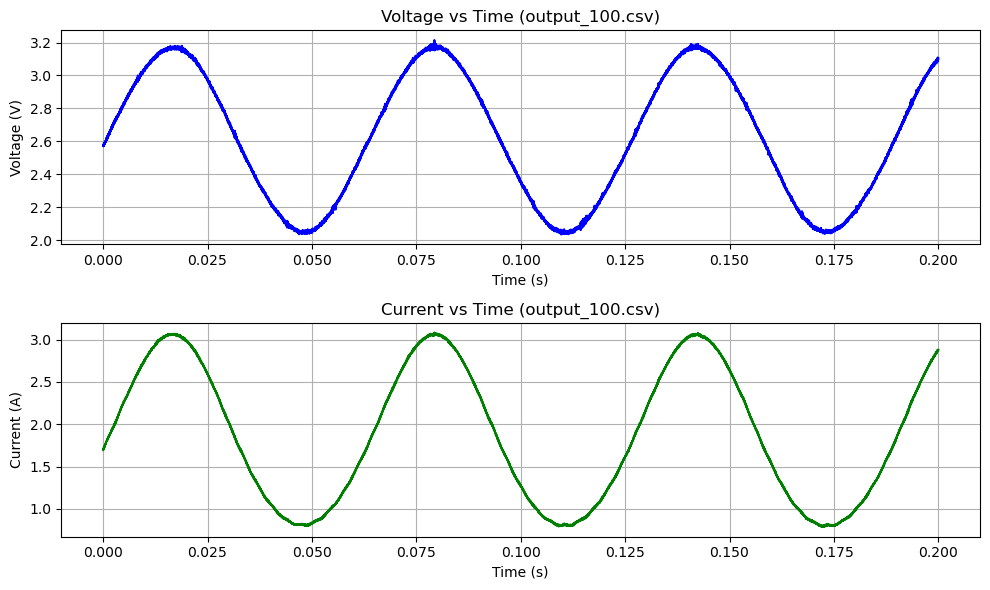

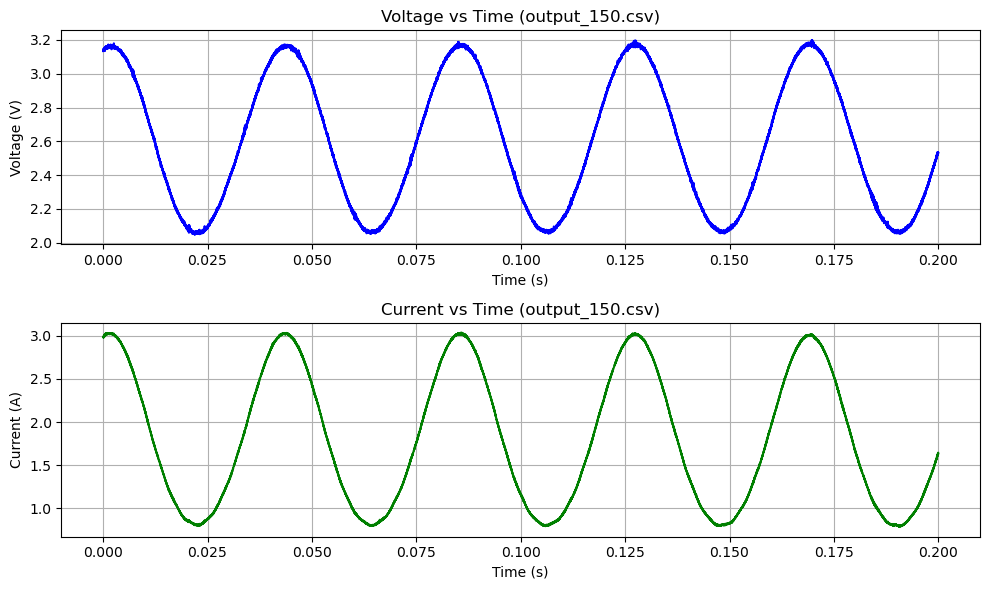

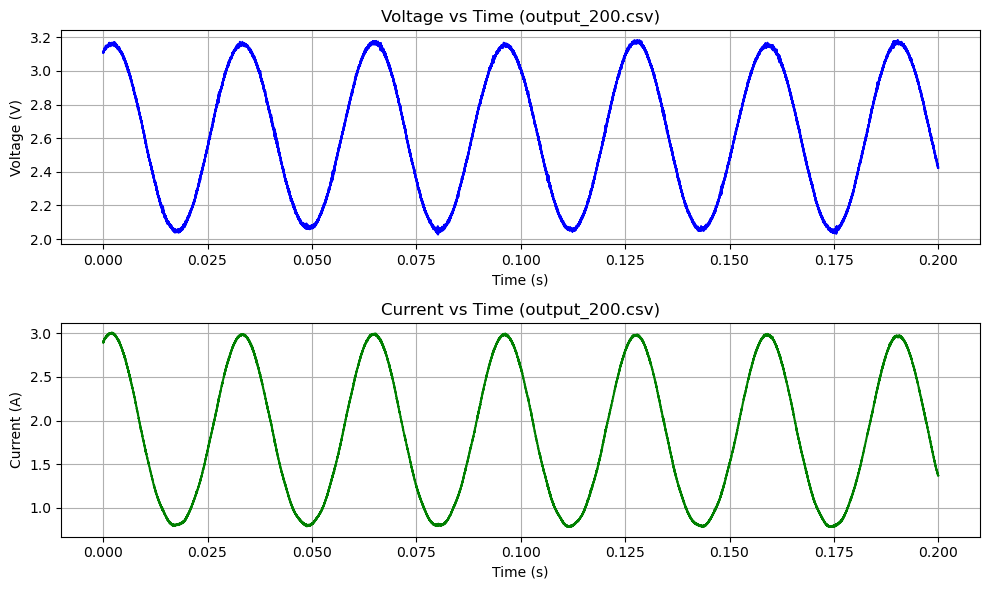

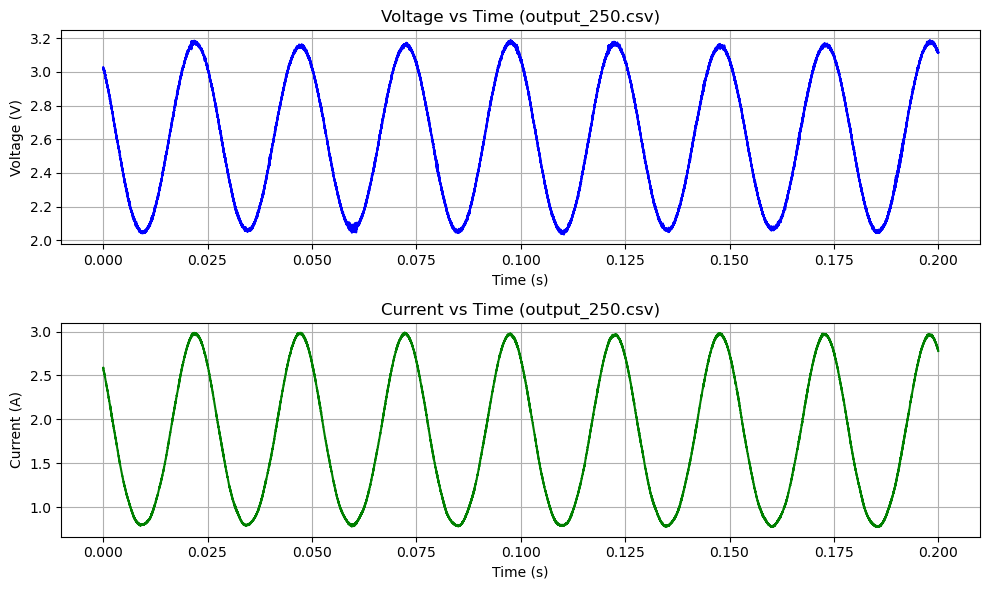

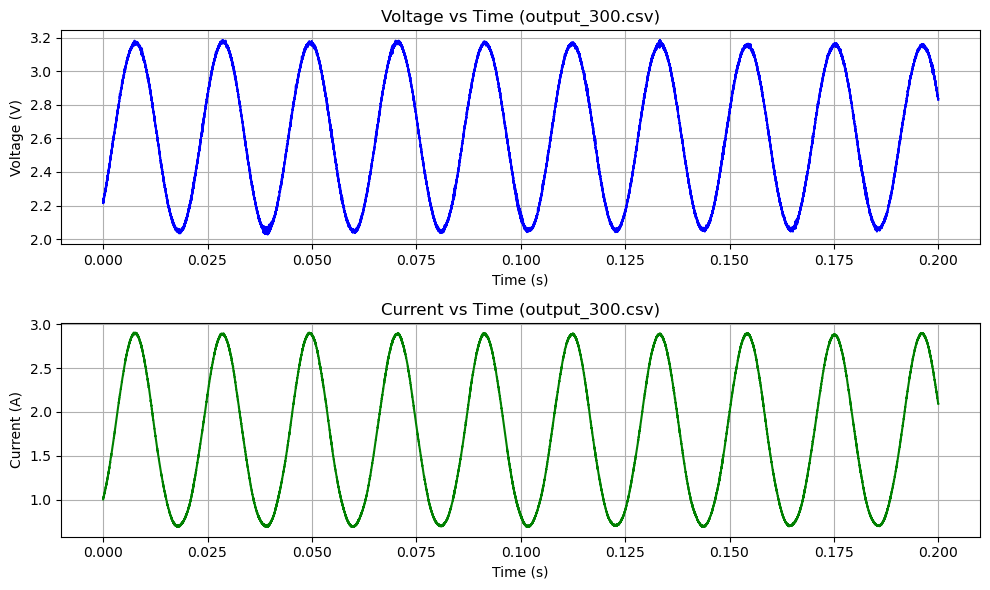

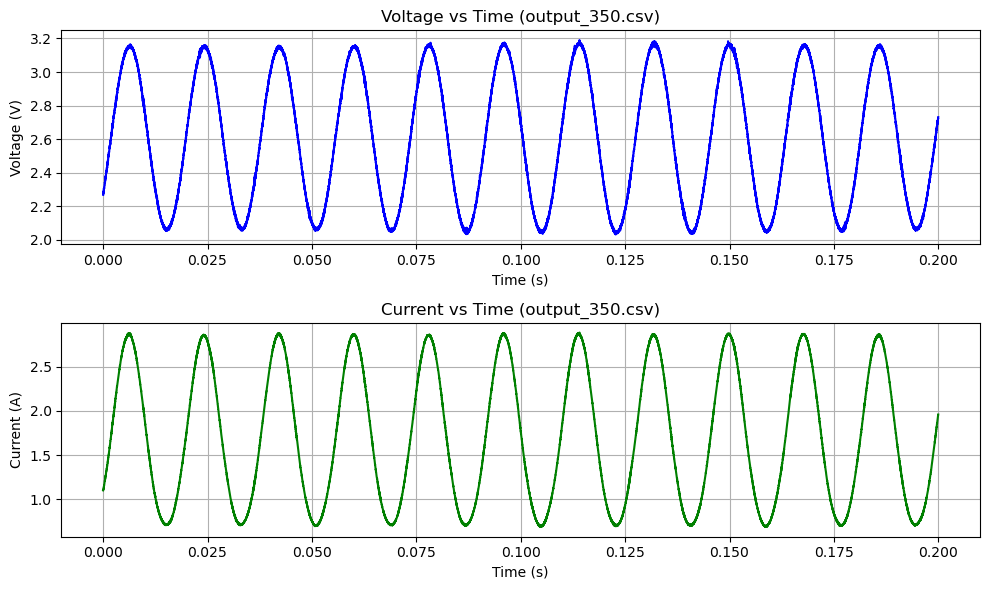

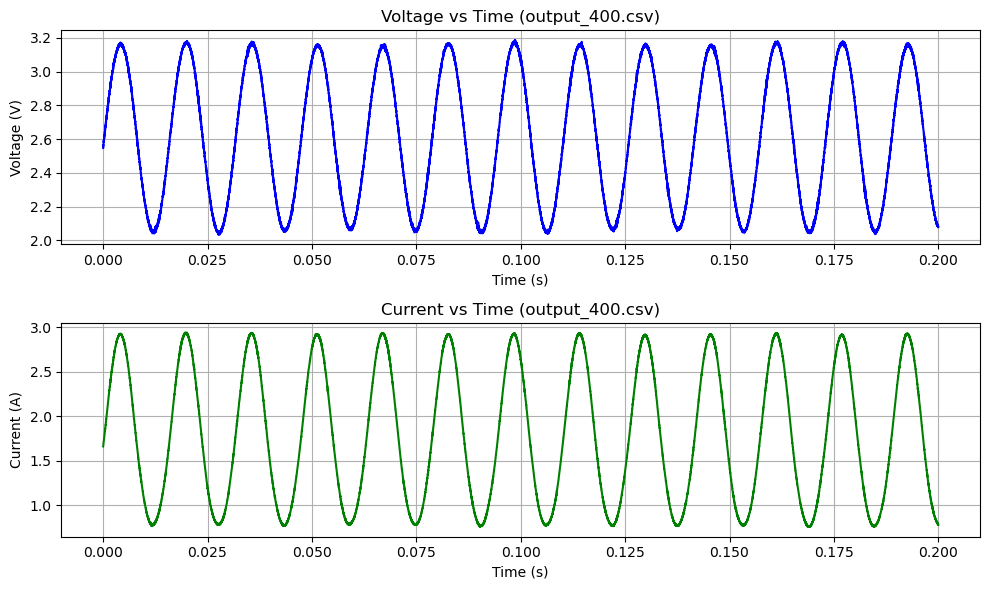

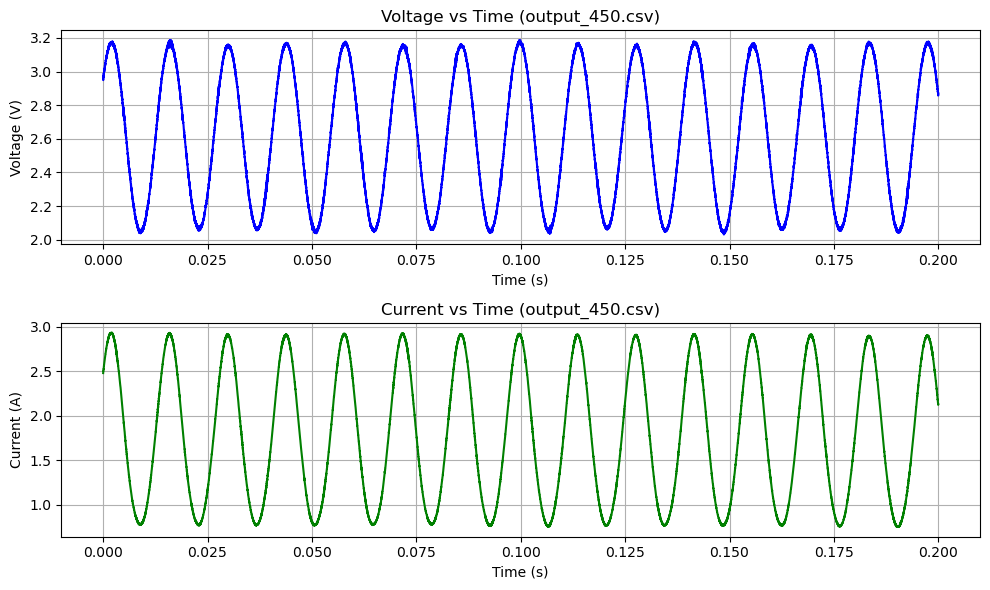

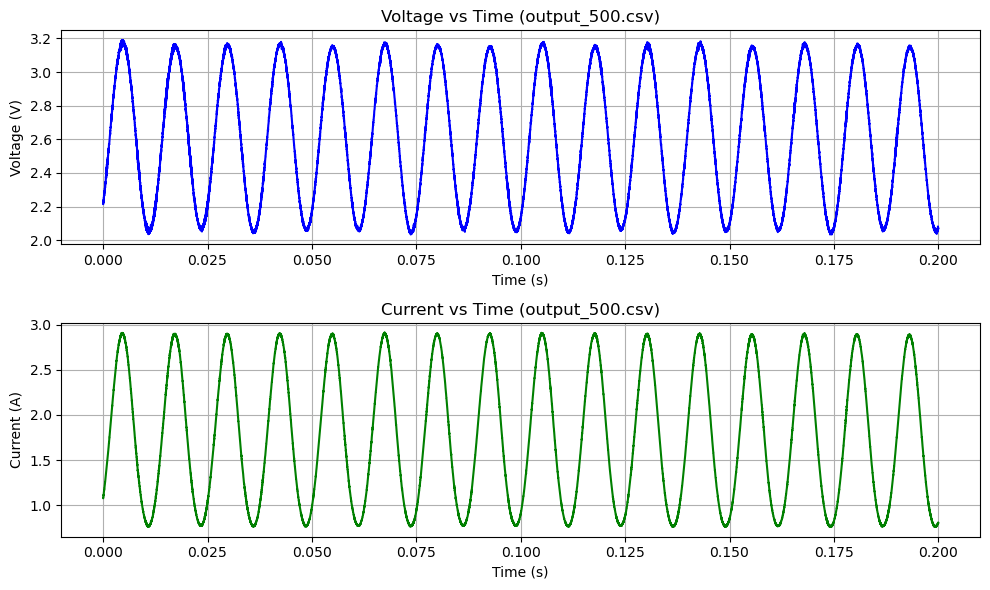

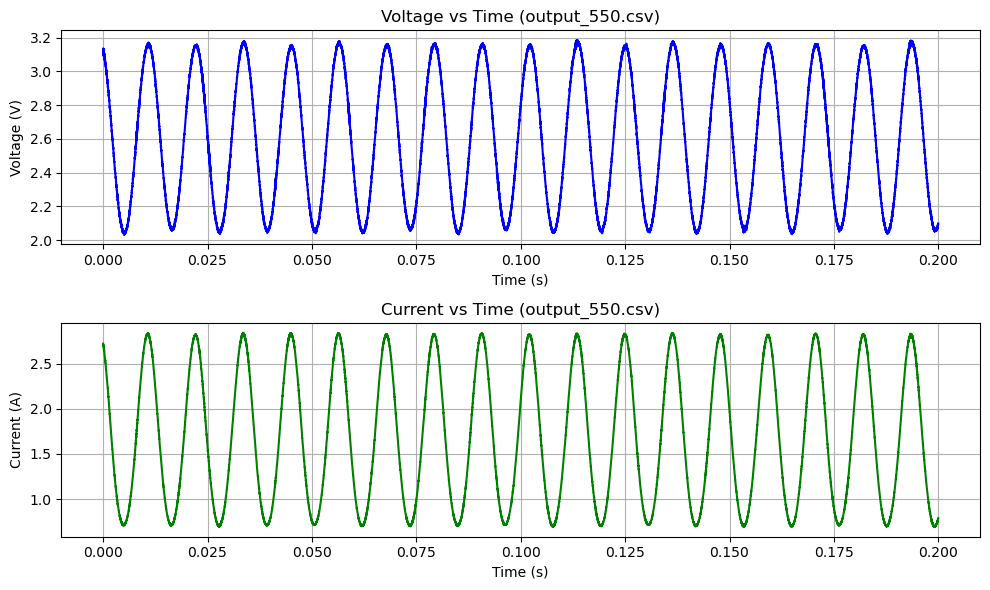

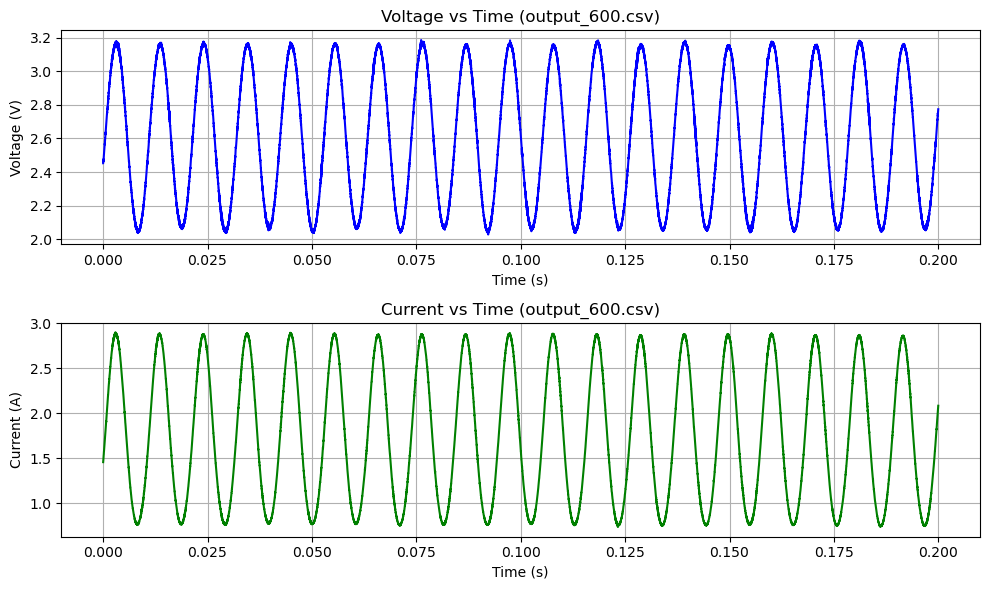

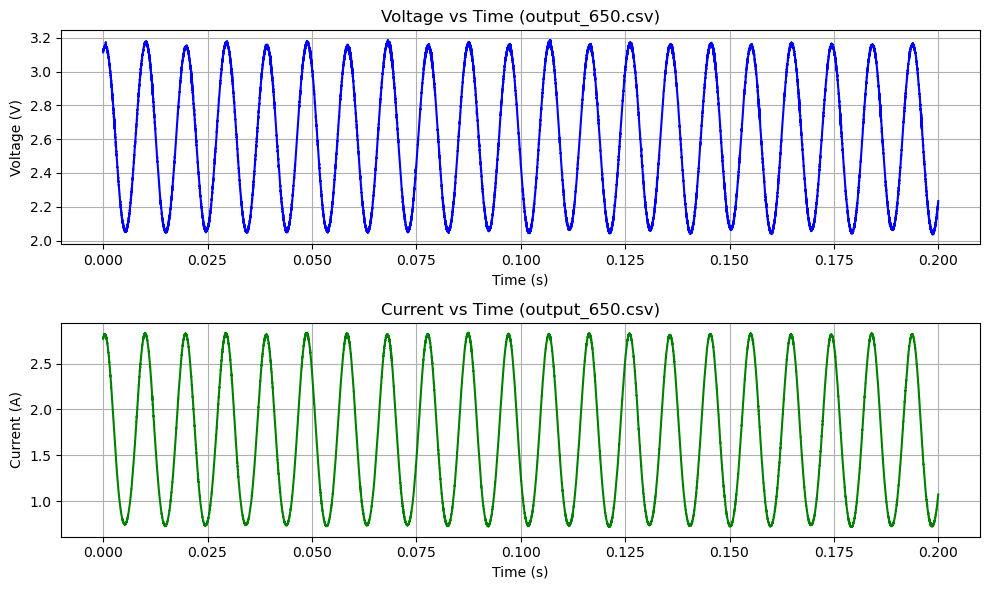

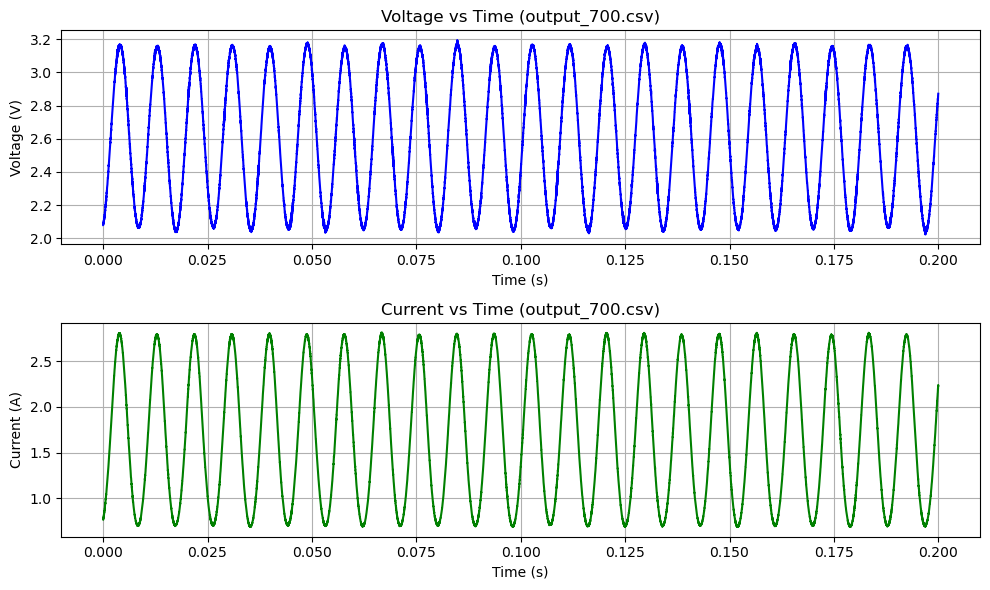

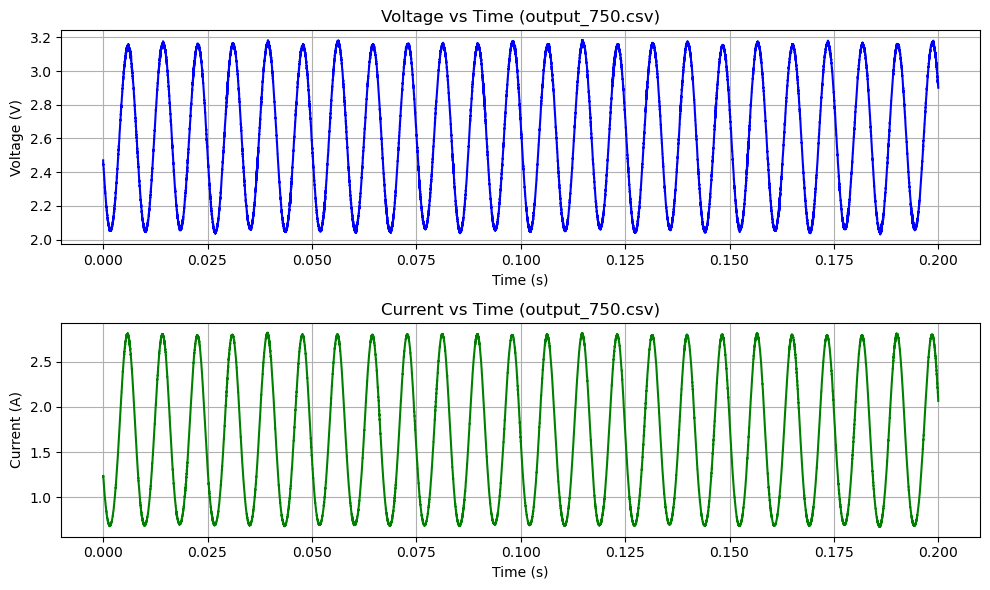

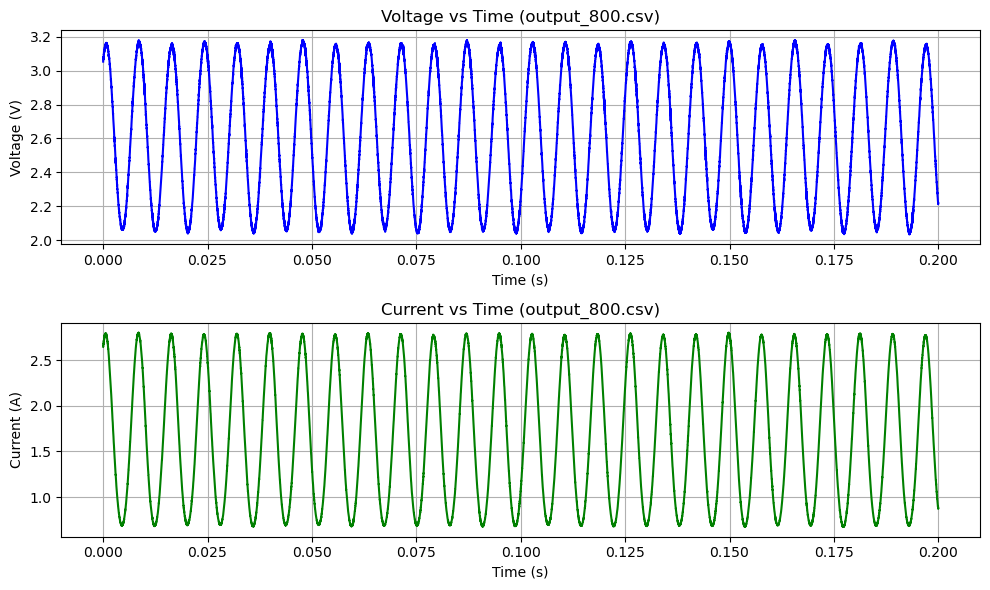

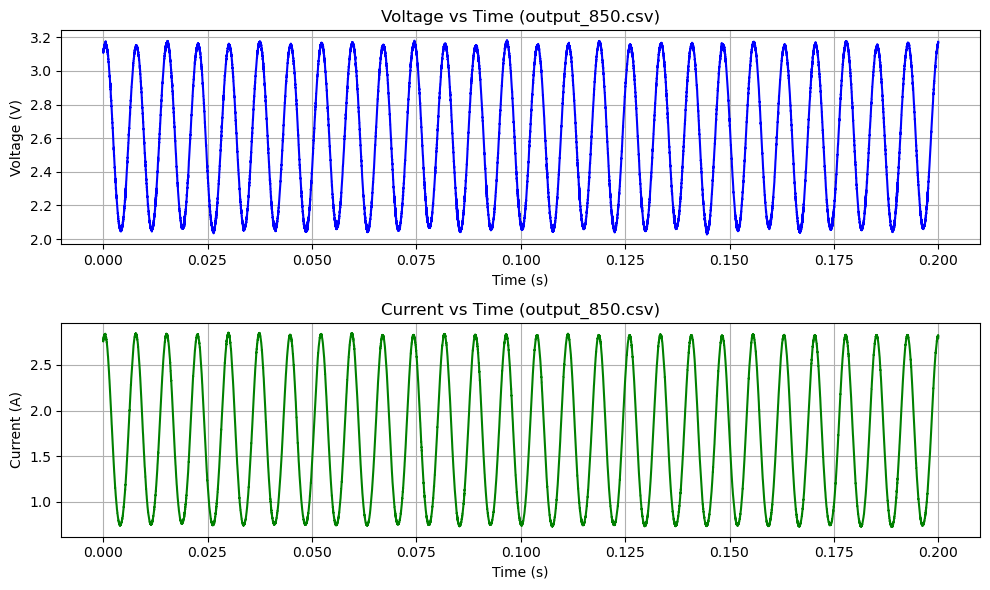

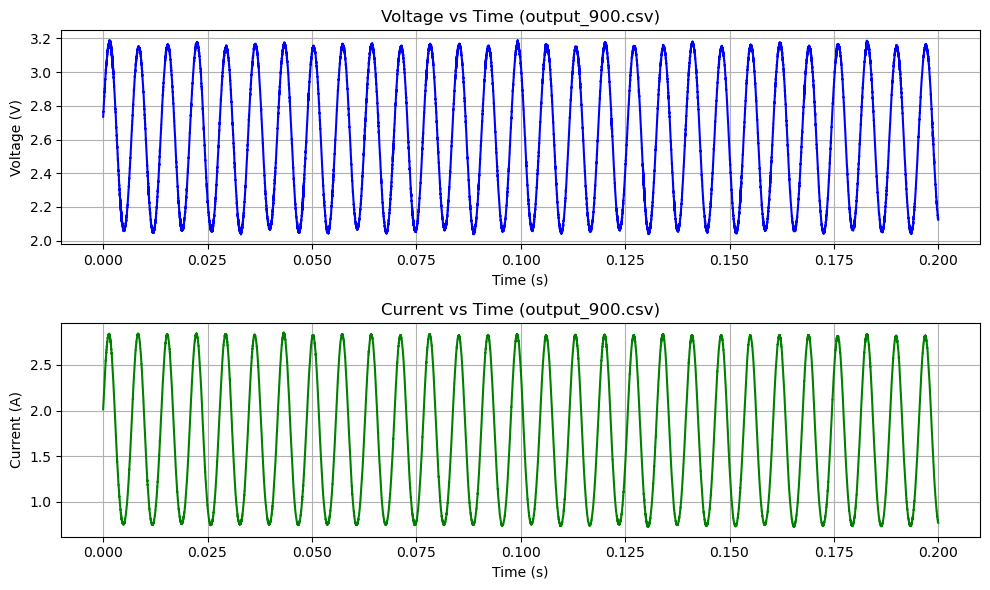

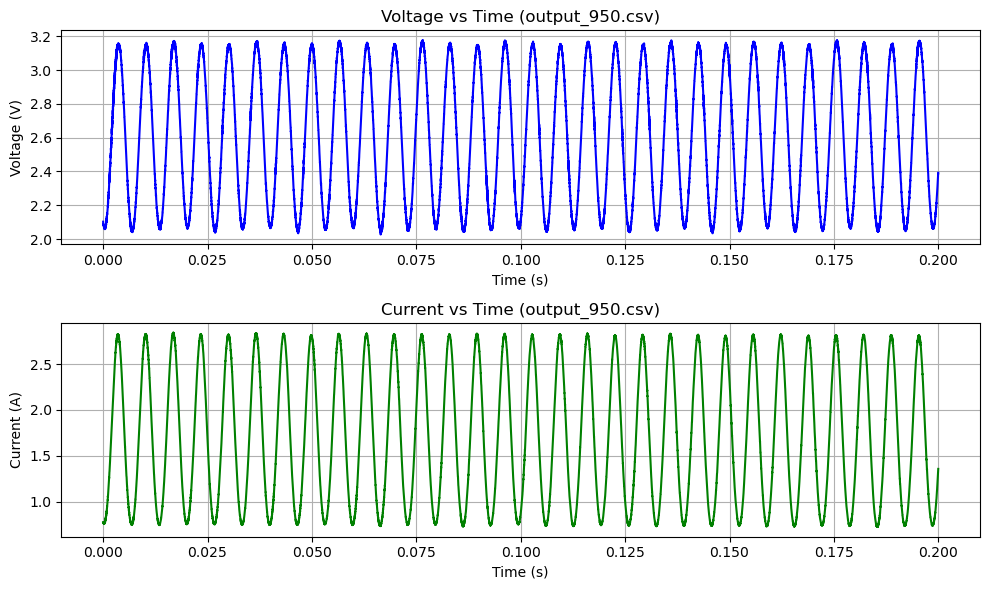

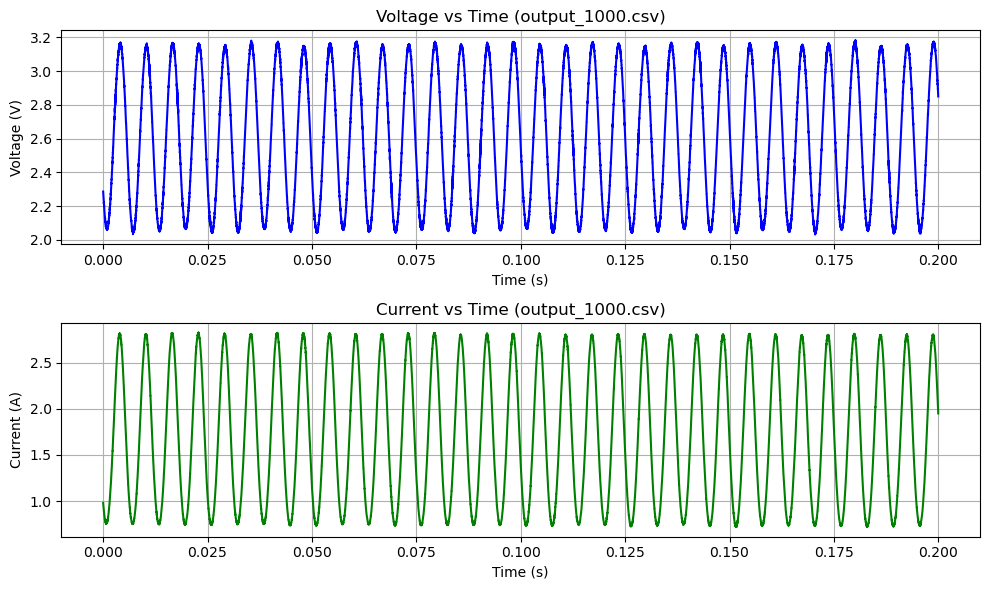

In [13]:
import matplotlib.pyplot as plt

for key in sorted(time_dict.keys()):
    voltage = voltage_dict[key]
    current = current_dict[key]
    time = time_dict[key]

    plt.figure(figsize=(10, 6))

    # 电压-时间图
    plt.subplot(2, 1, 1)
    plt.plot(time, voltage, color='blue')
    plt.title(f"Voltage vs Time (output_{key}.csv)")
    plt.xlabel("Time (s)")
    plt.ylabel("Voltage (V)")
    plt.grid(True)

    # 电流-时间图
    plt.subplot(2, 1, 2)
    plt.plot(time, current, color='green')
    plt.title(f"Current vs Time (output_{key}.csv)")
    plt.xlabel("Time (s)")
    plt.ylabel("Current (A)")
    plt.grid(True)

    plt.tight_layout()
    plt.show()

